In [1]:
# Only required in google colab 
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from functools import partial
import math
from matplotlib import pyplot as plt
import torch

def annealer(f):
    def inner(start, end):
        return partial(f, start, end)
    return inner
    
@annealer
def sched_lin(start, end, pos):
    return start + pos * (end-start)

We have created an annealer. It will help us to implement the mathematical func required to generate the desired learning rate.

Next we implement the mathmatical function.

In [0]:
@annealer
def sched_cos(start, end, pos): 
    return start + (1 + math.cos(math.pi*(1-pos))) * (end-start) / 2
@annealer
def sched_no(start, end, pos):  
    return start
@annealer
def sched_exp(start, end, pos): 
    return start * (end/start) ** pos


`a` has value of 0 to 100 with step of 1

`p` has value of 0 to 1 with step of .01

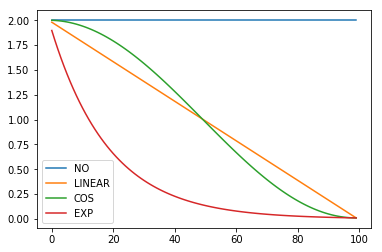

In [4]:
annealings = "NO LINEAR COS EXP".split()
torch.Tensor.ndim = property(lambda x: len(x.shape))


a = torch.arange(0, 100)
p = torch.linspace(0.01,1,100)

fns = [sched_no, sched_lin, sched_cos, sched_exp]
for fn, t in zip(fns, annealings):
    f = fn(2, 1e-2)
    plt.plot(a, [f(o) for o in p], label=t)
plt.legend();

In [5]:
p

tensor([0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800, 0.0900,
        0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700, 0.1800,
        0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600, 0.2700,
        0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500, 0.3600,
        0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400, 0.4500,
        0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300, 0.5400,
        0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200, 0.6300,
        0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100, 0.7200,
        0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000, 0.8100,
        0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900, 0.9000,
        0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800, 0.9900,
        1.0000])